<a href="https://colab.research.google.com/github/hattafaiq/pytorch-test/blob/master/pytorch_test_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=50, shuffle=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([50, 1, 28, 28])
torch.Size([50])


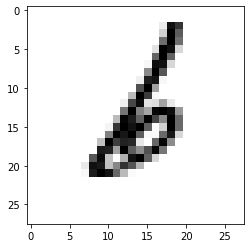

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [ ]:
figure = plt.figure()
num_of_images = 20
for index in range(1, num_of_images + 1):
    plt.subplot(6, 20, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
input_size = 784
hidden_sizes = [100, 50]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0037,  0.0037,  0.0037,  ...,  0.0037,  0.0037,  0.0037],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005]])


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
time0 = time()
epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.41026948191846413
Epoch 1 - Training loss: 0.2029741985645766
Epoch 2 - Training loss: 0.14554125434874246
Epoch 3 - Training loss: 0.11986786504314902
Epoch 4 - Training loss: 0.10385363376738194
Epoch 5 - Training loss: 0.0894100771388427
Epoch 6 - Training loss: 0.07705536666976211
Epoch 7 - Training loss: 0.07476821235866131
Epoch 8 - Training loss: 0.06898107954742348
Epoch 9 - Training loss: 0.05923096074281299
Epoch 10 - Training loss: 0.05802355056866266
Epoch 11 - Training loss: 0.051168227927507054
Epoch 12 - Training loss: 0.05193374351991224
Epoch 13 - Training loss: 0.04644885387063065
Epoch 14 - Training loss: 0.044317083515804066
Epoch 15 - Training loss: 0.03972398107206876
Epoch 16 - Training loss: 0.03888989826951729
Epoch 17 - Training loss: 0.03741061821672095
Epoch 18 - Training loss: 0.033830033400063256
Epoch 19 - Training loss: 0.03547048061590127

Training Time (in minutes) = 4.255704998970032


In [ ]:
torch.cuda.is_available()

False